In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/umachidambaram/Aug-2021 Stock Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '6 Data', 'Prepared Data ', 'df_regression.csv'),index_col = False )

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Index,Date,Open,High,Low,Close,Adj Close,Volume,country,Currency,High_con_currency,Open_con_currency,Year
0,0,0,0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,USD,528.690002,528.690002,1965
1,1,1,1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,USD,527.210022,527.210022,1966
2,2,2,2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,USD,527.840027,527.840027,1966
3,3,3,3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,USD,531.119995,531.119995,1966
4,4,4,4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,USD,532.070007,532.070007,1966


In [6]:
# Convert currency in the column Low to US Dollars 

def Low_con_currency(row):
    if row['country'] == 'United States':
        calc = row['Low']
        return calc
    elif row['country'] == 'China':
        calc = row['Low']*0.16
        return calc
    elif row['country'] == 'Canada':
        calc = row['Low']*0.8
        return calc
    elif row['country'] == 'India':
        calc = row['Low']*0.013
        return calc
    elif row['country'] == 'Switzerland':
        calc = row['Low']*1.08
        return calc
    elif row['country'] == 'Taiwan':
        calc = row['Low']*0.036
        return calc
    elif row['country'] == 'Africa':
        calc = row['Low']*0.067
        return calc
    elif row['country'] == 'Japan':
        calc = row['Low']*0.0089
        return calc
    elif row['country'] == 'Korea':
        calc = row['Low']*0.00084
        return calc
    else: return '0'

In [9]:
df['Low_con_currency'] =df.apply(Low_con_currency, axis=1)

# Convert the High (currency converted column) to float from object

df.Low_con_currency = df.Low_con_currency.astype(float)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Index,Date,Open,High,Low,Close,Adj Close,Volume,country,Currency,High_con_currency,Open_con_currency,Year,Low_con_currency
0,0,0,0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,USD,528.690002,528.690002,1965,528.690002
1,1,1,1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,USD,527.210022,527.210022,1966,527.210022
2,2,2,2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,USD,527.840027,527.840027,1966,527.840027
3,3,3,3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,USD,531.119995,531.119995,1966,531.119995
4,4,4,4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,USD,532.070007,532.070007,1966,532.070007


In [10]:
# Convert currency in the column Low to US Dollars 

def Close_con_currency(row):
    if row['country'] == 'United States':
        calc = row['Close']
        return calc
    elif row['country'] == 'China':
        calc = row['Close']*0.16
        return calc
    elif row['country'] == 'Canada':
        calc = row['Close']*0.8
        return calc
    elif row['country'] == 'India':
        calc = row['Close']*0.013
        return calc
    elif row['country'] == 'Switzerland':
        calc = row['Close']*1.08
        return calc
    elif row['country'] == 'Taiwan':
        calc = row['Close']*0.036
        return calc
    elif row['country'] == 'Africa':
        calc = row['Close']*0.067
        return calc
    elif row['country'] == 'Japan':
        calc = row['Close']*0.0089
        return calc
    elif row['country'] == 'Korea':
        calc = row['Close']*0.00084
        return calc
    else: return '0'

In [11]:
df['Close_con_currency'] =df.apply(Close_con_currency, axis=1)

# Convert the High (currency converted column) to float from object

df.Close_con_currency = df.Close_con_currency.astype(float)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Index,Date,Open,High,Low,Close,Adj Close,Volume,country,Currency,High_con_currency,Open_con_currency,Year,Low_con_currency,Close_con_currency
0,0,0,0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,USD,528.690002,528.690002,1965,528.690002,528.690002
1,1,1,1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,USD,527.210022,527.210022,1966,527.210022,527.210022
2,2,2,2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,USD,527.840027,527.840027,1966,527.840027,527.840027
3,3,3,3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,USD,531.119995,531.119995,1966,531.119995,531.119995
4,4,4,4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,USD,532.070007,532.070007,1966,532.070007,532.070007


In [12]:
df.rename(columns = {'Adj Close' : 'Adjust_Close', 'country': 'Country',}, inplace = True)

In [15]:
# Convert currency in the column Low to US Dollars 

def AdjClose_con_currency(row):
    if row['Country'] == 'United States':
        calc = row['Adjust_Close']
        return calc
    elif row['Country'] == 'China':
        calc = row['Adjust_Close']*0.16
        return calc
    elif row['Country'] == 'Canada':
        calc = row['Adjust_Close']*0.8
        return calc
    elif row['Country'] == 'India':
        calc = row['Adjust_Close']*0.013
        return calc
    elif row['Country'] == 'Switzerland':
        calc = row['Adjust_Close']*1.08
        return calc
    elif row['Country'] == 'Taiwan':
        calc = row['Adjust_Close']*0.036
        return calc
    elif row['Country'] == 'Africa':
        calc = row['Adjust_Close']*0.067
        return calc
    elif row['Country'] == 'Japan':
        calc = row['Adjust_Close']*0.0089
        return calc
    elif row['Country'] == 'Korea':
        calc = row['Adjust_Close']*0.00084
        return calc
    else: return '0'

In [16]:
df['AdjClose_con_currency'] =df.apply(AdjClose_con_currency, axis=1)

# Convert the High (currency converted column) to float from object

df.AdjClose_con_currency = df.AdjClose_con_currency.astype(float)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Index,Date,Open,High,Low,Close,Adjust_Close,Volume,Country,Currency,High_con_currency,Open_con_currency,Year,Low_con_currency,Close_con_currency,AdjClose_con_currency
0,0,0,0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,USD,528.690002,528.690002,1965,528.690002,528.690002,528.690002
1,1,1,1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,USD,527.210022,527.210022,1966,527.210022,527.210022,527.210022
2,2,2,2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,USD,527.840027,527.840027,1966,527.840027,527.840027,527.840027
3,3,3,3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,USD,531.119995,531.119995,1966,531.119995,531.119995,531.119995
4,4,4,4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,USD,532.070007,532.070007,1966,532.070007,532.070007,532.070007


In [57]:
df = df[["Index","Date","Year", "Open","Open_con_currency","High","High_con_currency","Low","Low_con_currency","Close","Close_con_currency","Adjust_Close","AdjClose_con_currency","Volume", "Country", "Currency"]]
df.head()

,Index,Date,Year,Open,Open_con_currency,High,High_con_currency,Low,Low_con_currency,Close,Close_con_currency,Adjust_Close,AdjClose_con_currency,Volume,Country,Currency
0,NYA,1965-12-31,1965,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,USD
1,NYA,1966-01-03,1966,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,USD
2,NYA,1966-01-04,1966,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,USD
3,NYA,1966-01-05,1966,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,USD
4,NYA,1966-01-06,1966,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,USD


In [39]:
# Get columns with numerical values only

df_num = df[["Volume","Open_con_currency","High_con_currency","Year","Low_con_currency","Close_con_currency","AdjClose_con_currency"]]

In [40]:
df_num.head()

,Volume,Open_con_currency,High_con_currency,Year,Low_con_currency,Close_con_currency,AdjClose_con_currency
0,0.0,528.690002,528.690002,1965,528.690002,528.690002,528.690002
1,0.0,527.210022,527.210022,1966,527.210022,527.210022,527.210022
2,0.0,527.840027,527.840027,1966,527.840027,527.840027,527.840027
3,0.0,531.119995,531.119995,1966,531.119995,531.119995,531.119995
4,0.0,532.070007,532.070007,1966,532.070007,532.070007,532.070007


In [42]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [43]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2.0535519820730302e+24,
 -3.881362171559576e+23,
 -2.5083315557007962e+23,
 -1.565952075275515e+23,
 -1.0354714327383938e+23,
 -7.022016732542751e+22,
 -5.039138097755027e+22,
 -3.781495225882788e+22,
 -3.02713675735816e+22]

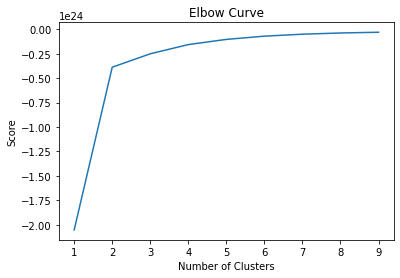

In [44]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [45]:
# The elbow (breaking point) of the curve is at 2.
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 


In [46]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

KMeans(n_clusters=2)

In [47]:
df_num['clusters'] = kmeans.fit_predict(df_num)

<ipython-input-47-aa5fc057b78a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['clusters'] = kmeans.fit_predict(df_num)


In [48]:
df_num.head()

,Volume,Open_con_currency,High_con_currency,Year,Low_con_currency,Close_con_currency,AdjClose_con_currency,clusters
0,0.0,528.690002,528.690002,1965,528.690002,528.690002,528.690002,0
1,0.0,527.210022,527.210022,1966,527.210022,527.210022,527.210022,0
2,0.0,527.840027,527.840027,1966,527.840027,527.840027,527.840027,0
3,0.0,531.119995,531.119995,1966,531.119995,531.119995,531.119995,0
4,0.0,532.070007,532.070007,1966,532.070007,532.070007,532.070007,0


In [49]:
df['clusters'].value_counts()

0    105588
1      4665
Name: clusters, dtype: int64

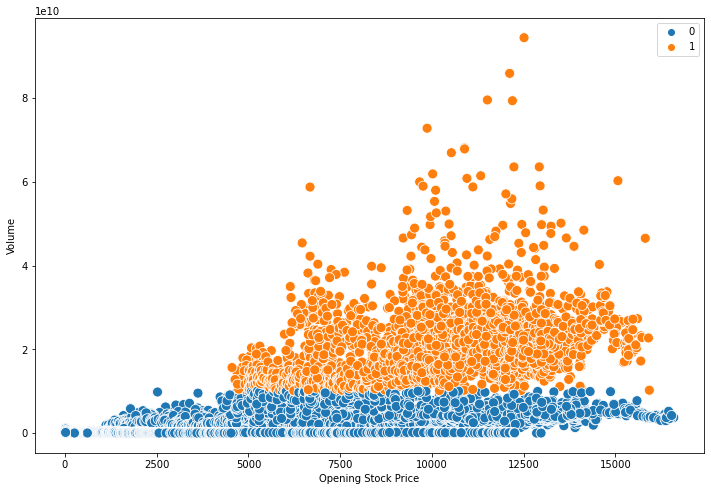

In [50]:
# Plot the clusters for the "Opening Stock Price" and "Volume" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Open_con_currency'], y=df_num['Volume'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Opening Stock Price') # Label x-axis.
plt.ylabel('Volume') # Label y-axis.
plt.show()

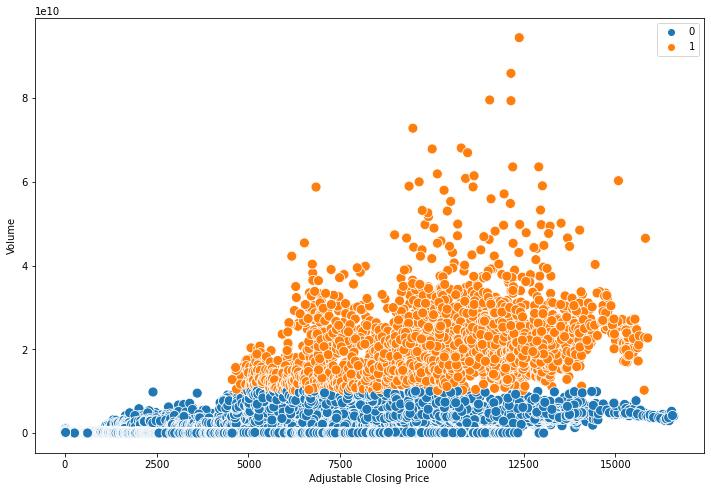

In [51]:
# Plot the clusters for the "Adjustable Closing Price" and "Volume" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['AdjClose_con_currency'], y=df_num['Volume'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Adjustable Closing Price') 
plt.ylabel('Volume') 
plt.show()

In [54]:
df.loc[df_num['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df_num['clusters'] == 0, 'cluster'] = 'pink'

In [55]:
df_num.groupby('cluster').agg({'Open_con_currency':['mean', 'median'], 
                         'Volume':['mean', 'median'], 
                         'AdjClose_con_currency':['mean', 'median'],
                          'High_con_currency':['mean', 'median']})

Open_con_currency                     Volume                \
                     mean       median          mean        median   
cluster                                                              
pink          1978.295850    579.22998  4.570455e+08  3.104000e+05   
purple       10139.682993  10388.16016  1.976443e+10  1.887496e+10   

        AdjClose_con_currency               High_con_currency                
                         mean        median              mean        median  
cluster                                                                      
pink              1978.146911    579.174988       1988.947058    580.390015  
purple           10137.095322  10391.439848      10190.187497  10468.320312

Opening Stock Price between 10000 and 15000 USD tend to have more Volume. Adjustable Closing Price of 10000 to 12500 USD tend to have more volume with a high peak at 12500. Volume is high in the purple category and so is the Open, Adjustable Close and High.

In [58]:
# 13. Export df to Prepared Data folder

df_num.to_csv(os.path.join(path, '6 Data', 'Prepared Data ', 'df_machine_learning.csv'))
df.to_csv(os.path.join(path, '6 Data', 'Prepared Data ', 'df_curr_con.csv'))